Pablo Armas Rosales


---

Máster Universitario en Big Data y Ciencia de Datos (Abril 2024)
\
Minería de Datos
\
Actividad 2


1. Implementamos librerias

In [177]:
%pip install biclustlib
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering, AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
import multiprocessing
from biclustlib.evaluation import *
from biclustlib.algorithms import *
from biclustlib.algorithms.wrappers import *
from biclustlib.benchmark import GeneExpressionBenchmark, Algorithm
from biclustlib.benchmark.data import load_tavazoie, load_prelic
from biclustlib.io import *


2. Leemos los datos

Hemos seleccionado de Kaggle un dataset
 (https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis ) que contiene información complerta detallada de 2015  pacientes diagnosticados con la enfermedad de Parkinson, cada uno de ellos identificado de forma única con ID que van del 3058 al 5162.

 Este conjunto de datos comprende información de salud completa de 2105 pacientes diagnosticados con la enfermedad de Parkinson, cada uno de ellos identificado de forma única con ID que van del 3058 al 5162. El conjunto de datos incluye detalles demográficos, factores del estilo de vida, historial médico, mediciones clínicas, evaluaciones cognitivas y funcionales, síntomas y un diagnóstico indicador.

 Con este conjunto de datos nuestro objetivo será buscar y explorar factores asociados con la enfermedad de Parkinson para desarrolar análisis estdísticos y un modelo predictivo.

 Las variables que tenemos en el dataset son:


*   PatientID: identificador asignado a cada paciente.
*   Age: Edad del paciente.
*   Gender: Genero del paciente, donde 0 representa que es hombre y 1 representa que es mujer.
*  Ethnicity: Etnia del paciente codificada como:
       *   0: Caucasian
       *   1: African American
       *   2: Asian
       *   3: Other
*   EducationLevel: nivel de educación del paciente, codificado como:
       *   0: None
       *   1: High School
       *   2: Bachelor's
       *   3: Higher

*   BMI: Índice de Masa Corporal de los pacientes.
*   Smoking: Estado de fumar, donde 0 indica No y 1 indica sí.
*   AlcoholConsumption: Consumo semanal de alcohol en unidades.
*   PhysicalActivity: Actividad física semanal en horas.
*   DietQuality: Puntuación de calidad de la dieta, que va de 0 a 10
*   SleepQuality: Puntuación de calidad del sueño, que va de 4 a 10.
*   FamilyHistoryParkinsons: Antecedentes familiares de enfermedad de Parkinson, donde 0 indica No y 1 indica Sí.
*   TraumaticBrainInjury: Historial de lesión cerebral traumática, donde 0 indica No y 1 indica Sí.
*   Hypertension: Presencia de hipertensión, donde 0 indica No y 1 indica Sí.
*   Diabetes: Presencia de diabetes, donde 0 indica No y 1 indica Sí.
*   Depression: Presencia de depresion, donde 0 indica No y 1 indica Sí.
*   Stroke: Historial de accidente cerebrovascular, donde 0 indica No y 1 indica Sí.
*   SystolicBP: Presión arterial sistólica, que oscila entre 90 y 180 mmHg.
* DiastolicBP: Presión arterial diastólica, que oscila entre 60 y 120 mmHg.
* CholesterolTotal: Niveles de colesterol total, que oscilan entre 150 y 300 mg/dL.
* ColesterolLDL: Niveles de colesterol unido a lipoproteínas de baja densidad, que oscilan entre 50 y 200 mg/dL.
* CholesterolHDL: Niveles de colesterol unido a lipoproteínas de alta densidad, que oscilan entre 20 y 100 mg/dL.
* CholesterolTriglycerides:: Niveles de triglicéridos, que oscilan entre 50 y 400 mg/dL.
* UPDRS: Puntuación de la Escala Unificada de Calificación de la Enfermedad de Parkinson, que va de 0 a 199. Las puntuaciones más altas indican una mayor gravedad de la enfermedad.
* MoCA: puntuación de la Evaluación Cognitiva de Montreal, que va de 0 a 30. Las puntuaciones más bajas indican deterioro cognitivo.
* FunctionalAssessment: Puntuación de la evaluación funcional, que va de 0 a 10. Las puntuaciones más bajas indican un mayor deterioro.
* Tremor: Presencia de temblor, donde 0 indica No y 1 indica Sí.
* Rigidity: Presencia de rigidez muscular, donde 0 indica No y 1 indica Sí.
* Bradykinesia: Presencia de bradicinesia (lentitud de movimiento), donde 0 indica No y 1 indica Sí.
* PosturalInstability: Presencia de inestabilidad postural, donde 0 indica No y 1 indica Sí.
* SpeechProblems: Presencia de problemas del habla, donde 0 indica No y 1 indica Sí.
* SleepDisorders: Presencia de trastornos del sueño, donde 0 indica No y 1 indica Sí.
* Constipation: Presencia de estreñimiento, donde 0 indica No y 1 Diagnosis: Estado del diagnóstico de la Enfermedad de Parkinson, donde 0 indica No y 1 indica Sí.
* DoctorInCharge: Esta columna contiene información confidencial sobre el médico a cargo, con "DrXXXConfid" como valor para todos los pacientes.




In [178]:
#cargamos los datos
dfparkinson = pd.read_csv('parkinsons_disease_data.csv')

In [179]:
dfparkinson.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [180]:
dfparkinson.shape
#Tenemos 2105 filas y 35 columnas

(2105, 35)

In [181]:
dfparkinson.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [182]:
dfparkinson.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid
2104,5162,56,0,0,2,16.569934,0,1.985084,1.400441,9.883835,...,5.015131,0,0,0,0,1,0,1,0,DrXXXConfid


Las colunmas PatientID y DoctorInCharge las vamos a eliminar ya que no tienen significado futuro para crear y analizar nuestro modelo.

In [183]:
dfparkinson.drop(['PatientID','DoctorInCharge'], axis=1, inplace=True)
dfparkinson

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,6.296231,...,28.634010,8.076254,1,0,0,0,1,1,0,0
2101,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,6.342325,...,13.106537,1.665751,0,0,0,1,0,1,1,1
2102,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,9.740019,...,26.527734,4.785614,0,0,0,0,1,1,0,1
2103,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,8.289390,...,19.873404,8.378979,1,0,1,0,0,1,1,1


Veamos si existen filas duplicadas y si hay valores nulos en alguna de ellas.

In [184]:
duplicates = dfparkinson[dfparkinson.duplicated()]
num_duplicates = duplicates.shape[0]
print(f'Número de filas duplicadas: {num_duplicates}')

Número de filas duplicadas: 0


In [185]:
dfparkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int64  
 14  Depressi

In [186]:
dfparkinson.dtypes

Age                           int64
Gender                        int64
Ethnicity                     int64
EducationLevel                int64
BMI                         float64
Smoking                       int64
AlcoholConsumption          float64
PhysicalActivity            float64
DietQuality                 float64
SleepQuality                float64
FamilyHistoryParkinsons       int64
TraumaticBrainInjury          int64
Hypertension                  int64
Diabetes                      int64
Depression                    int64
Stroke                        int64
SystolicBP                    int64
DiastolicBP                   int64
CholesterolTotal            float64
CholesterolLDL              float64
CholesterolHDL              float64
CholesterolTriglycerides    float64
UPDRS                       float64
MoCA                        float64
FunctionalAssessment        float64
Tremor                        int64
Rigidity                      int64
Bradykinesia                

In [187]:
# Verificar valores faltantes en atributos numéricos
missing_numeric = dfparkinson.select_dtypes(include=['number']).isna().any()

# Mostrar columnas con valores faltantes
if missing_numeric.any():
    print("Valores faltantes en atributos numéricos:")
    print(missing_numeric[missing_numeric].index.tolist())
else:
    print("No hay valores faltantes en atributos numéricos.")

No hay valores faltantes en atributos numéricos.


Vemos que tenemos 21 variables tipo int64, es decir, variables enteras y 12 variables tipo float64. Como hemos visato antes no es necesario realizar un mapeo sobre la varible target o en este caso sobre ninguna variable object utilizando la funcion pd.(get_dummies) ya que todas son variables cuantitaivas. Ademñas hemos visto que no hay filas duplicadas ni valores faltantes en alguna de ellas.

In [188]:
# Calcular estadísticas descriptivas
dfparkinson.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Veamos una representación gráfica, mediante un histograma, de las columnas numéricas. Para ello vamos a definir 'columns_objet' que reprensetará nuestras columnas de tipo categórico puestas previamente en modo cuantitativo. Y una vez hecho esto representamos las columnas numéricas menos estas.

In [189]:
columns_objet = ['Gender', 'Ethnicity', 'EducationLevel','Smoking','FamilyHistoryParkinsons','TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression','Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']

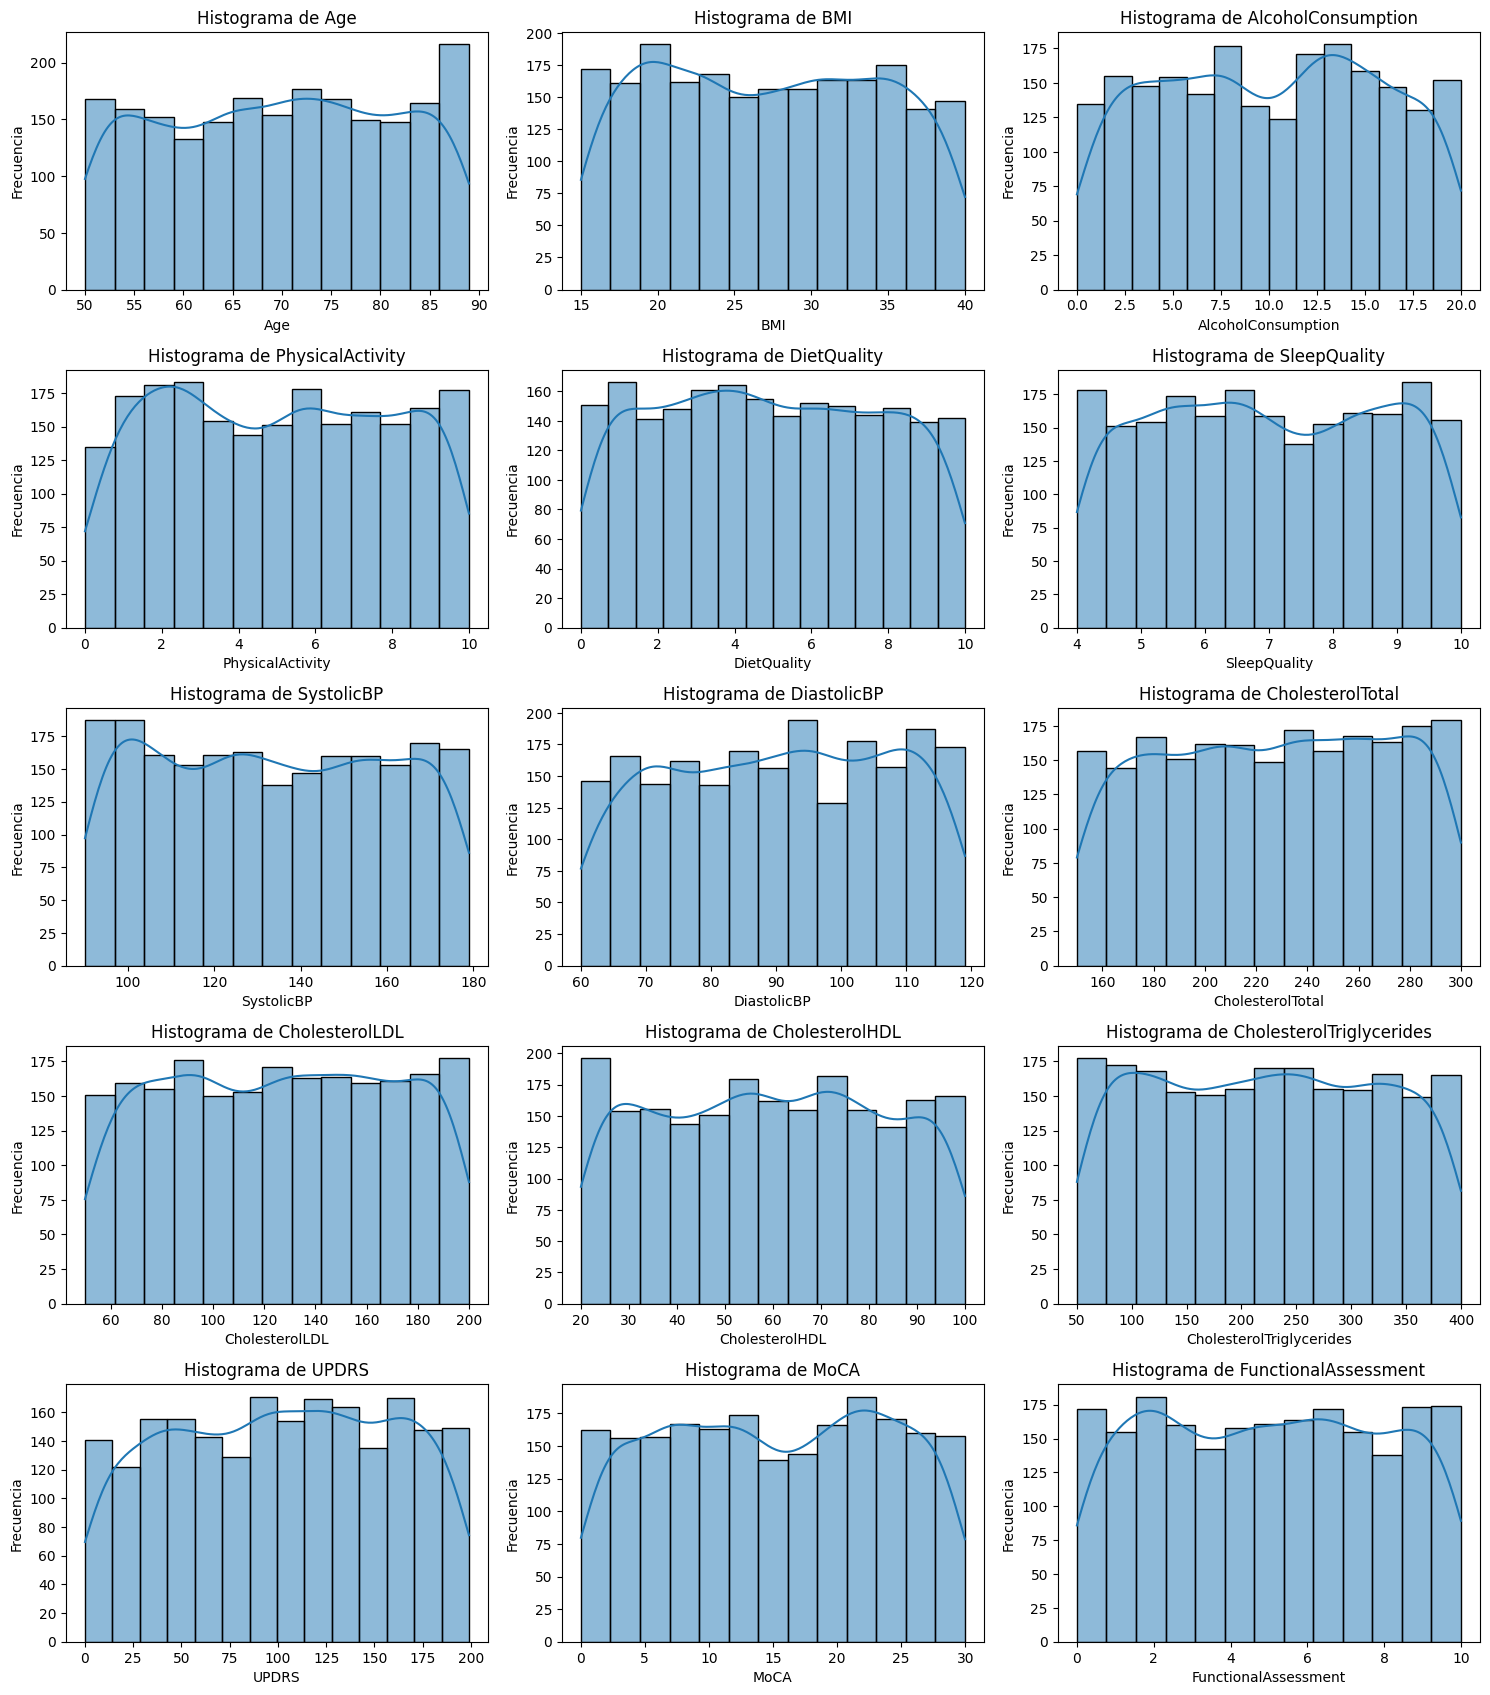

In [190]:

# Seleccionar todas las columnas numéricas
numeric_columns = dfparkinson.select_dtypes(include=['number']).columns

# Definir las columnas que deseas excluir
columns_to_exclude = columns_objet  # Reemplaza con los nombres de las columnas que quieres excluir

# Filtrar las columnas numéricas excluyendo las no deseadas
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

plt.figure(figsize=(15, 20))  # Tamaño de la figura

# Crear un histograma para cada columna numérica restante
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.histplot(dfparkinson[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# Para que no se superpongan las subgráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Podemos observar que la distribución de las variables no se asemeja a una distribución normal. Por lo que procederemos luego a normalizar las variables.

Veamos ahora una representación mediante boxplot de estas columnas numéricas para ver la presencia de outliers.

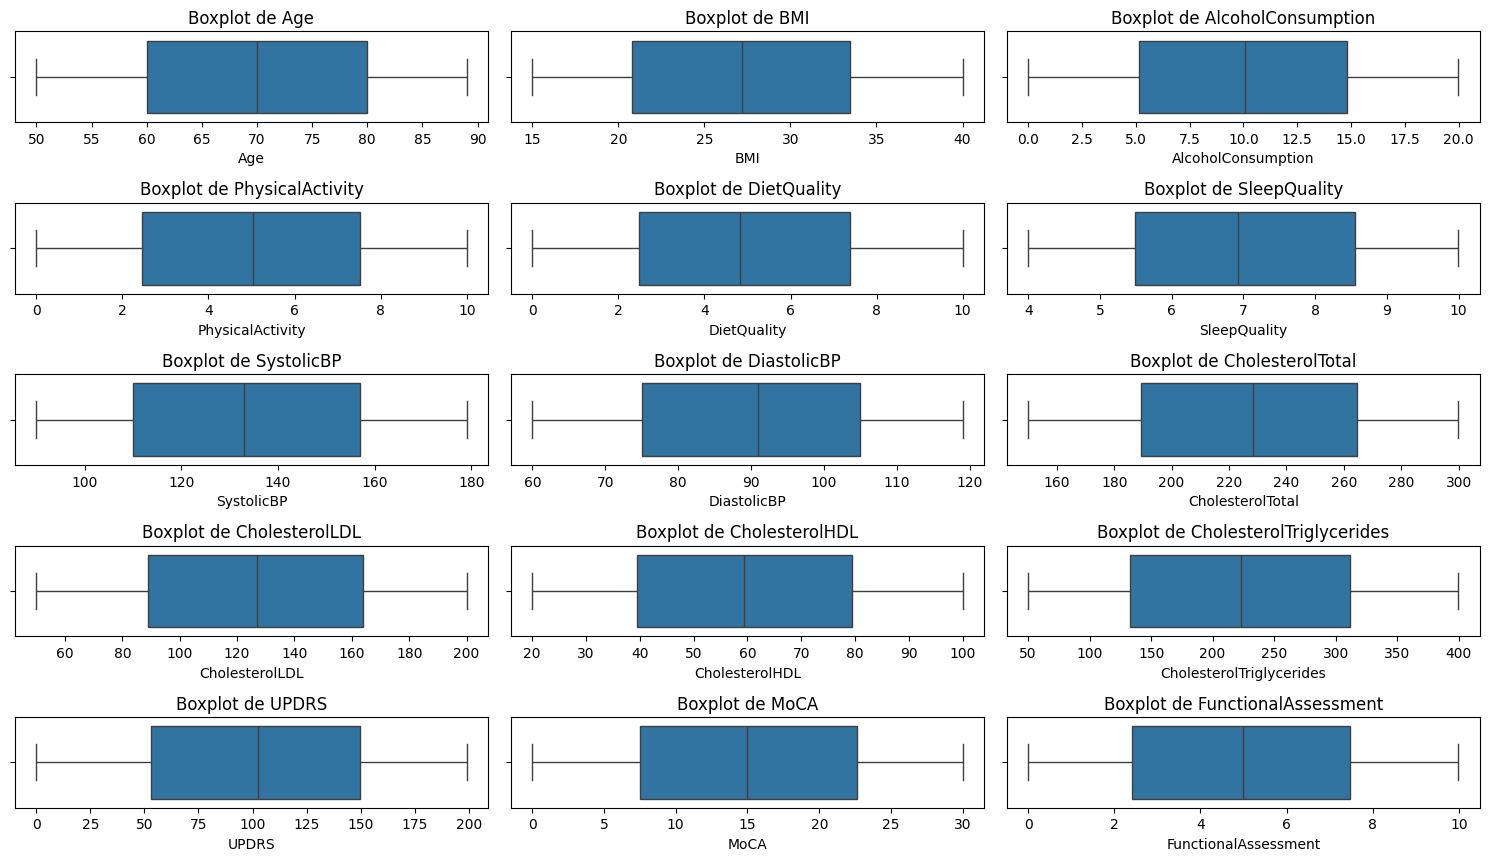

In [191]:
#BOXPLOT
# Seleccionar todas las columnas numéricas
numeric_columns = dfparkinson.select_dtypes(include=['number']).columns
# Definir las columnas que deseas excluir
columns_to_exclude = columns_objet
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]
# Visualización de outliers utilizando boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate (numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=dfparkinson[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Visualmente podemos apreciar que no parece haber valores fuera de rango (outliers) en ninguna de las variables numericas de nuestro dataset.

Veamos ahora gráficos de densidad de nuestras columnas numéricas

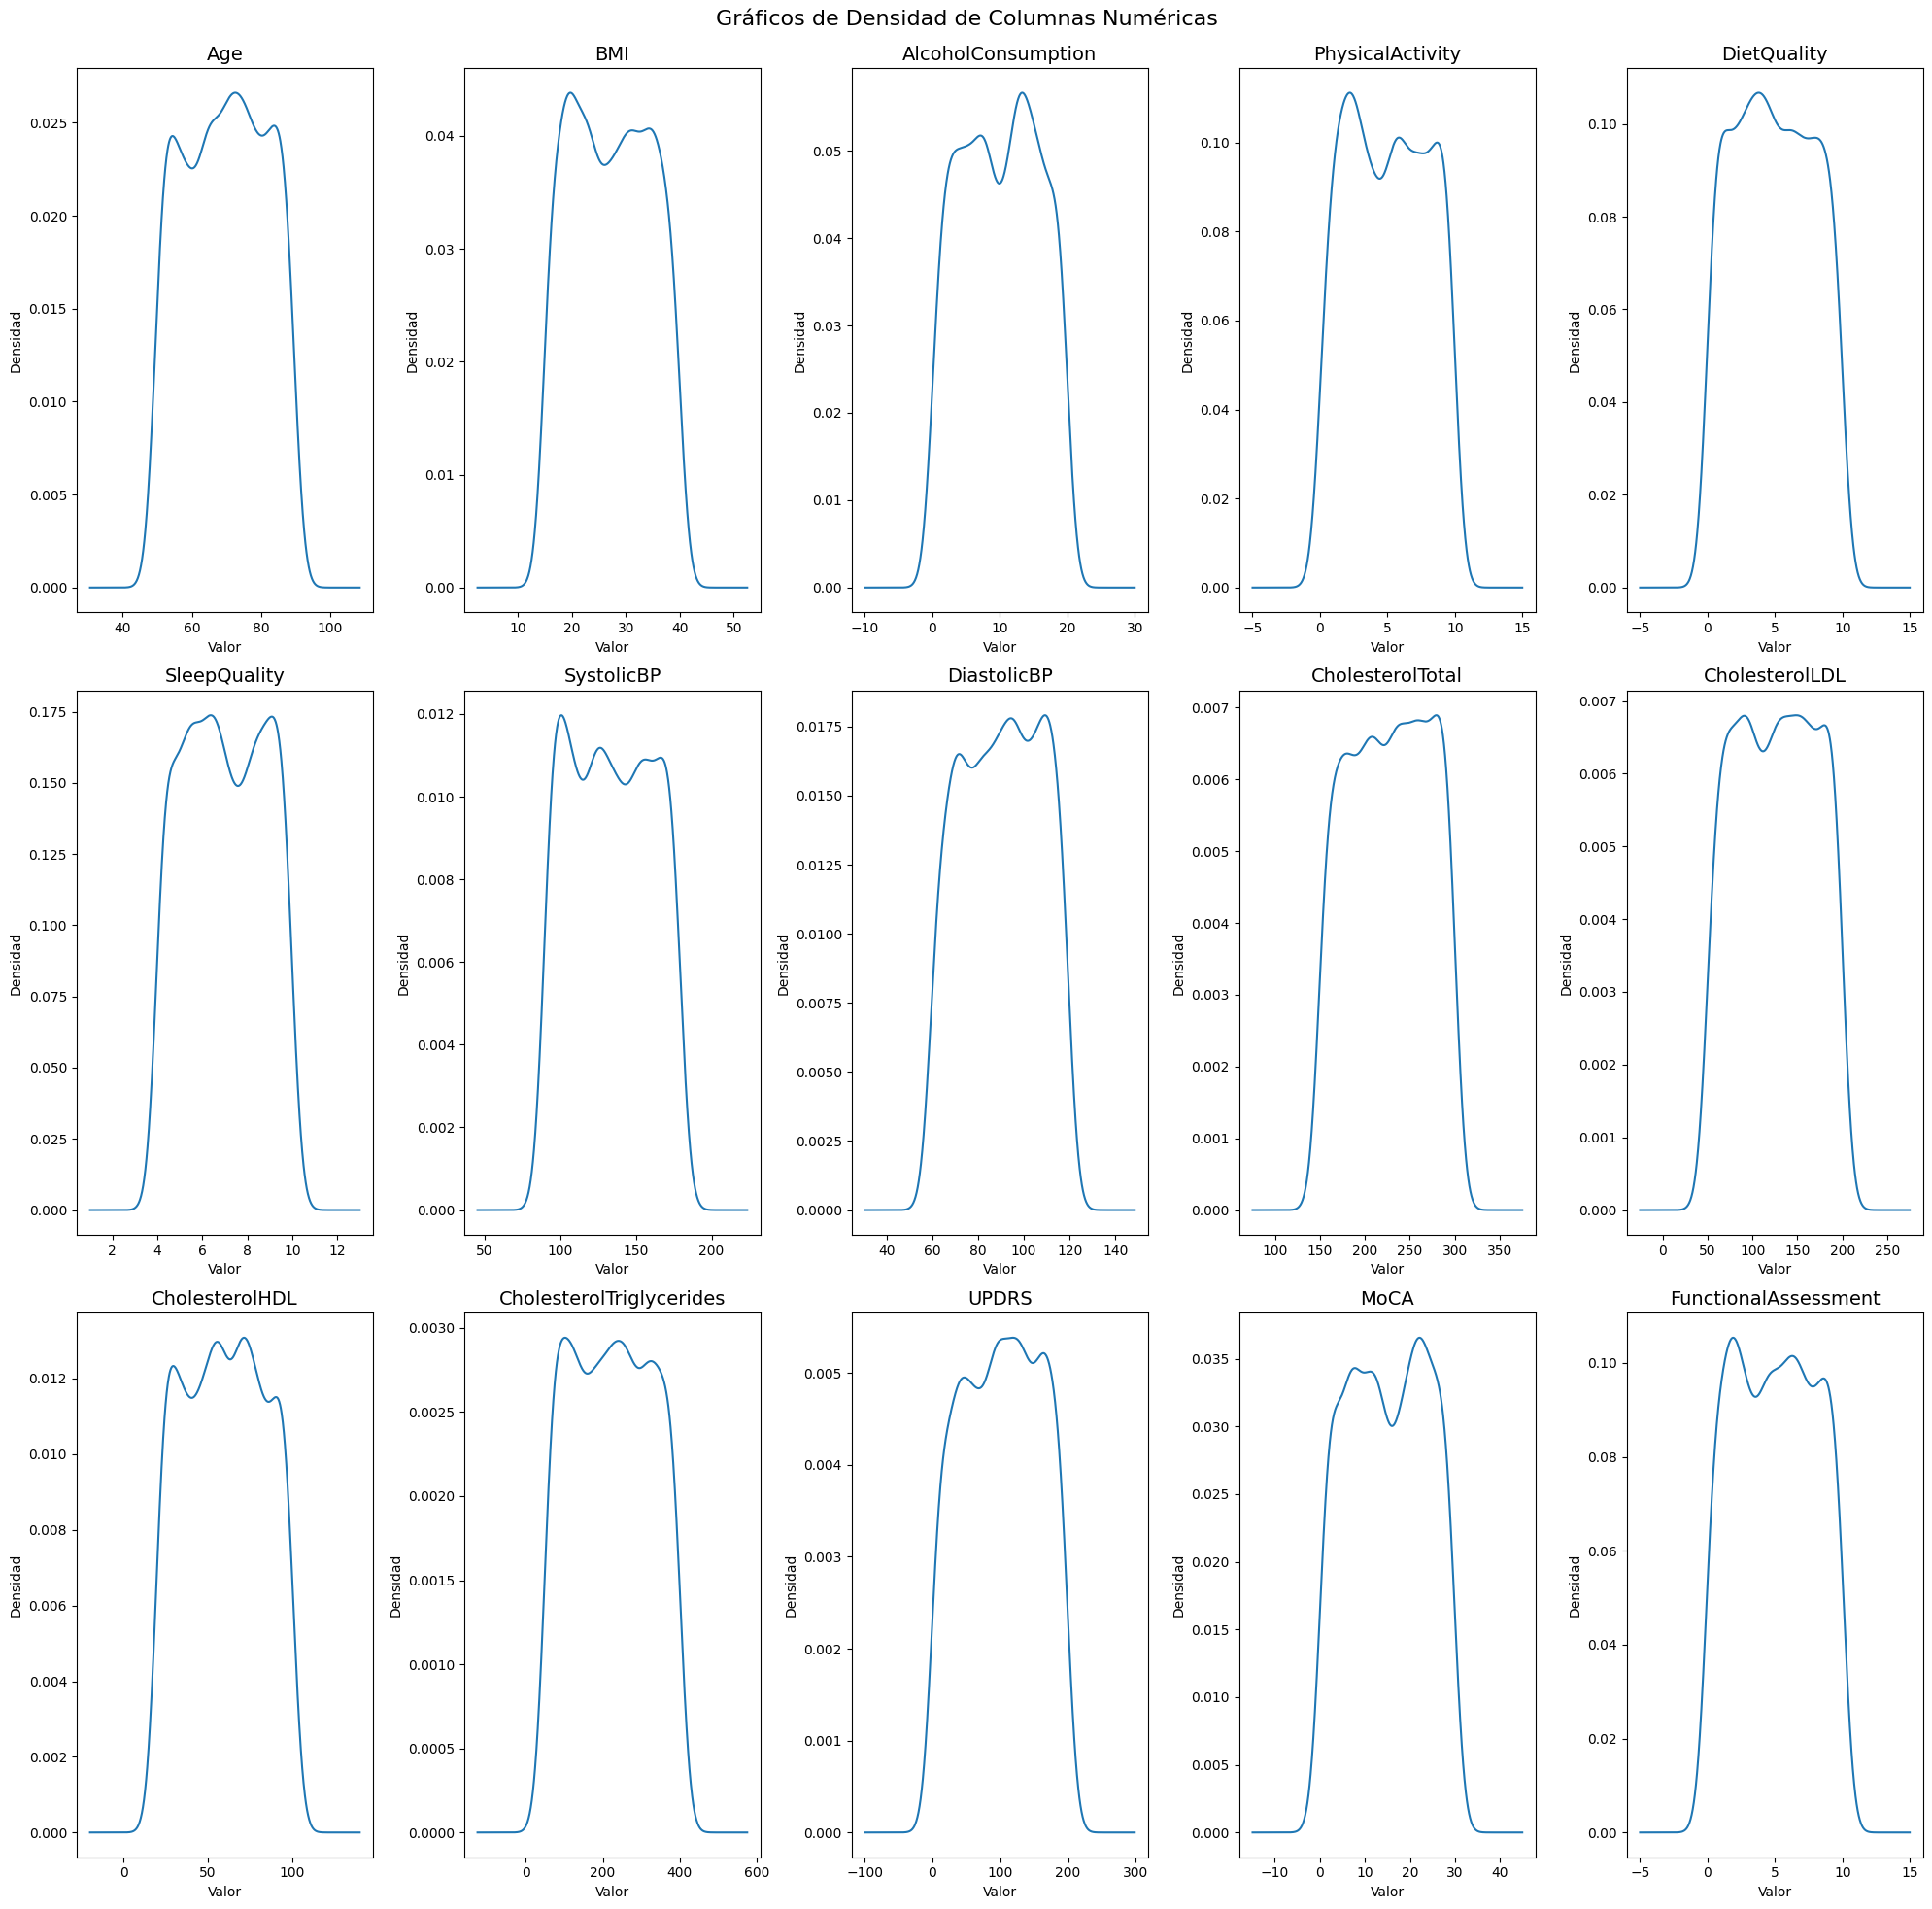

In [192]:
#Graficos de densidad columnas numéricas
# Seleccionamos todas las columnas numéricas
numeric_columns = dfparkinson.select_dtypes(include=['number']).columns
# Definimos las columnas que deseamos excluir
columns_to_exclude = columns_objet
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

# Creamos la figura y los ejes
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
fig.suptitle('Gráficos de Densidad de Columnas Numéricas', fontsize=16)

# Representamos cada columna numérica
for i, column in enumerate(numeric_columns):
    row_index = i // 5
    col_index = i % 5
    dfparkinson[column].plot(kind='density', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(column, fontsize=14)
    axes[row_index, col_index].set_xlabel('Valor')
    axes[row_index, col_index].set_ylabel('Densidad')

# Ajustamos el diseño
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Ajustamos la parte superior de la figura para acomodar el título principal
plt.show()

Observamos como hemos visto al hacer el histograma que hay varios picos y que será necesario normalizar nuestras variables.

Calculemos ahora estadísticas de nuestras variables categóticas y veamos una representación de cada una de ellas mediante un diagrama de barras.

In [193]:
# Calculamos estadísticas descriptivas

# Identificamos las variables categóricas
print("Variables Categóricas:")
print(columns_objet)

# Calcular estadísticas descriptivas para cada variable categórica
for col in columns_objet:
    print(f"\nEstadísticas para la variable categórica: {col}")

    # Frecuencias absolutas
    freq_abs = dfparkinson[col].value_counts()
    print("Frecuencias Absolutas:")
    print(freq_abs)

    # Frecuencias relativas
    freq_rel = dfparkinson[col].value_counts(normalize=True)
    print("\nFrecuencias Relativas:")
    print(freq_rel)

Variables Categóricas:
['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']

Estadísticas para la variable categórica: Gender
Frecuencias Absolutas:
Gender
0    1068
1    1037
Name: count, dtype: int64

Frecuencias Relativas:
Gender
0    0.507363
1    0.492637
Name: proportion, dtype: float64

Estadísticas para la variable categórica: Ethnicity
Frecuencias Absolutas:
Ethnicity
0    1270
1     425
3     213
2     197
Name: count, dtype: int64

Frecuencias Relativas:
Ethnicity
0    0.603325
1    0.201900
3    0.101188
2    0.093587
Name: proportion, dtype: float64

Estadísticas para la variable categórica: EducationLevel
Frecuencias Absolutas:
EducationLevel
1    840
2    656
0    388
3    221
Name: count, dtype: int64

Frecuencias Relativas:
EducationLevel
1    

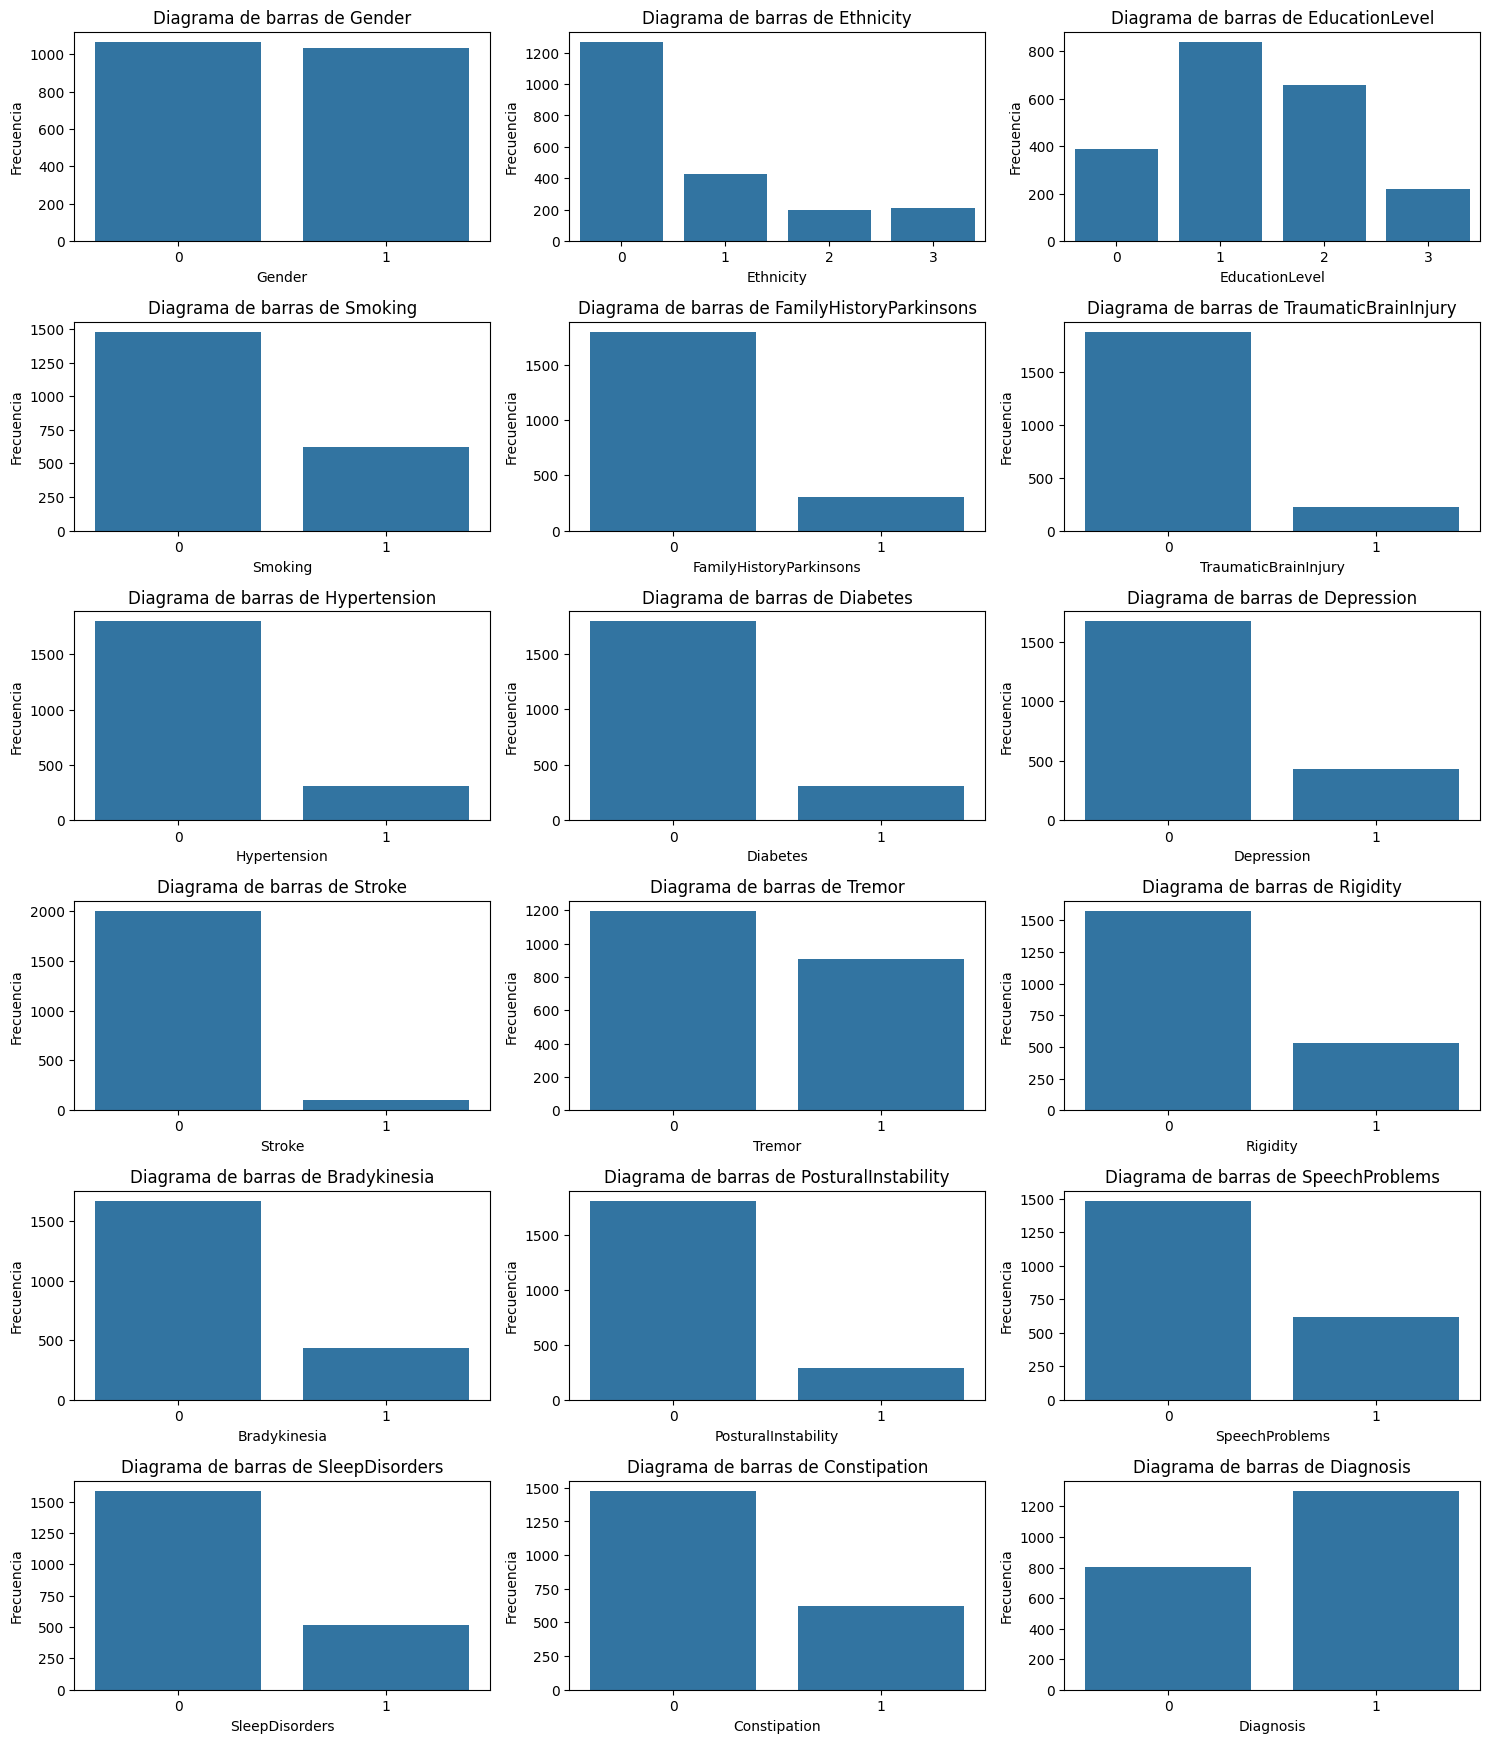

In [194]:
#Diagrama de barras columnas categóricas
plt.figure(figsize=(15, 20))

# Creamos un diagrama de barras para cada columna categórica
for i, column in enumerate(columns_objet, 1):
    plt.subplot(len(columns_objet) // 3 + 1, 3, i)
    sns.countplot(data=dfparkinson, x=column)
    plt.title(f'Diagrama de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

A continuación veamos la matriz de correlaciones para ver la correlación que existe entre las variables.

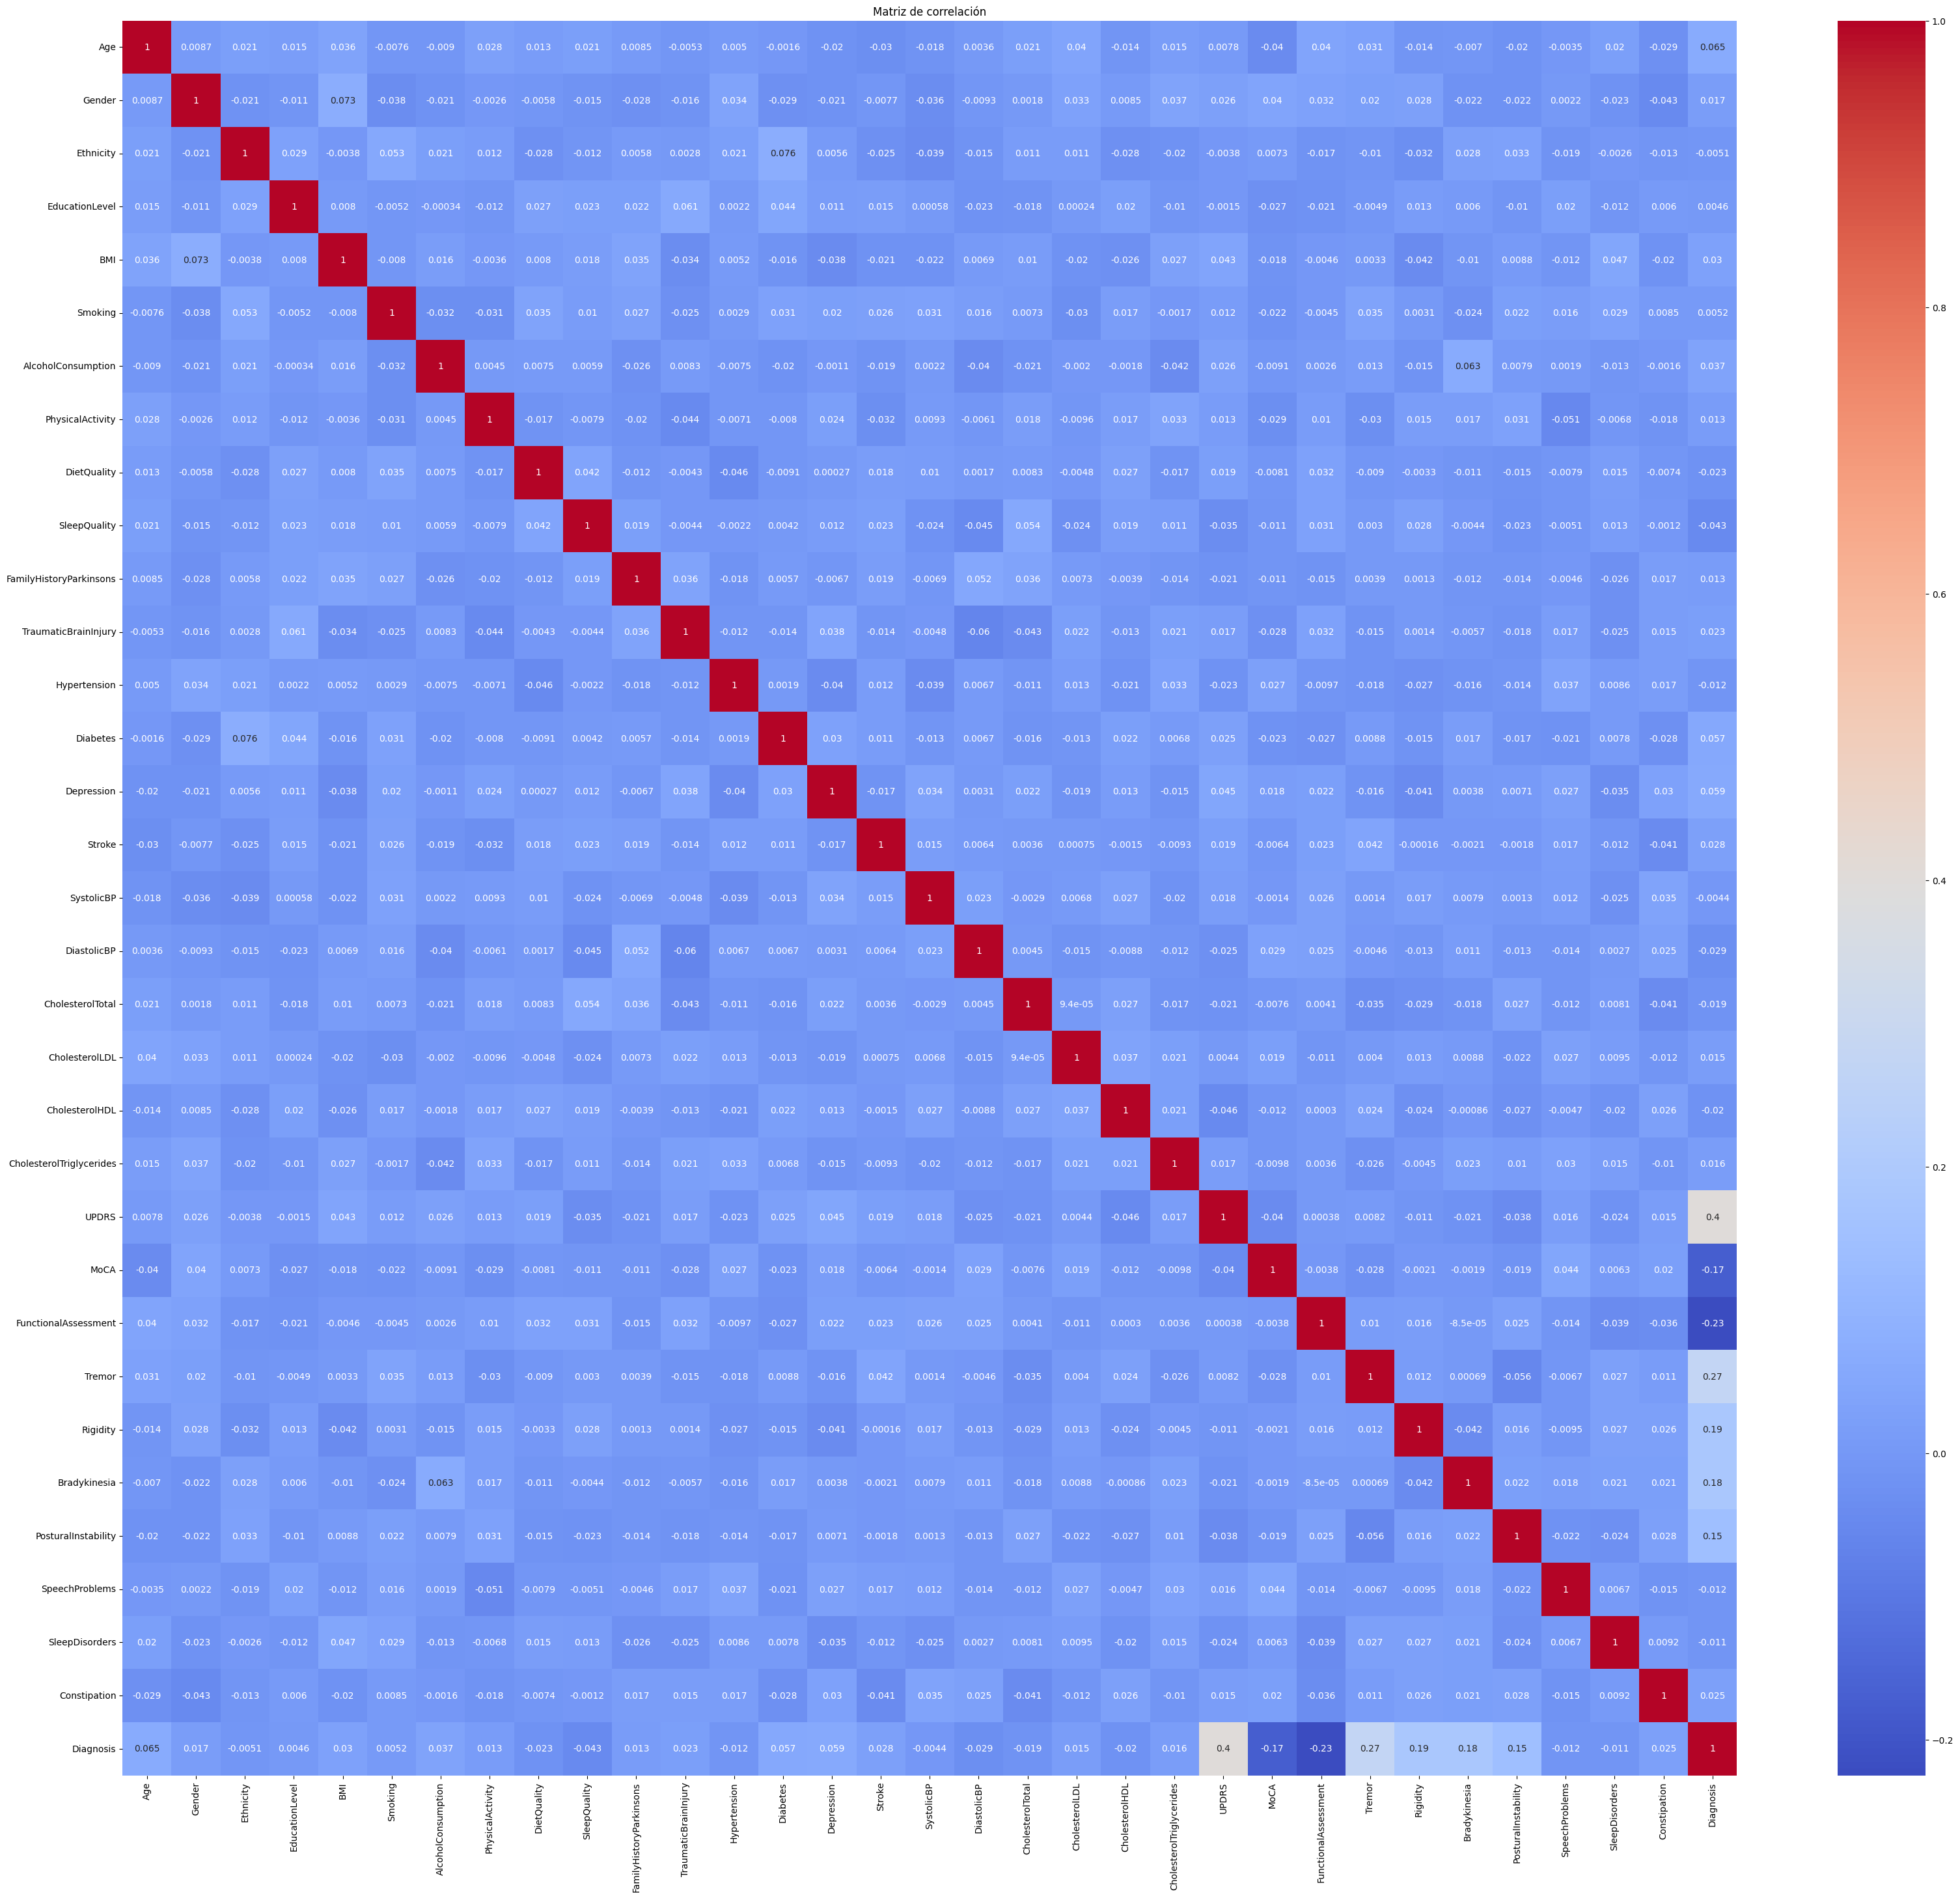

In [195]:
correlation_matrix = dfparkinson.corr()
plt.figure(figsize=(40, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [196]:
# Seleccionar la variable específica de interés, variable target.
variable_of_interest = 'Diagnosis'

# Encontrar las correlaciones más altas para Diagnosis con el resto de variables
highest_correlations = correlation_matrix[variable_of_interest].sort_values(ascending=False)
print(highest_correlations)

Diagnosis                   1.000000
UPDRS                       0.398006
Tremor                      0.274370
Rigidity                    0.185611
Bradykinesia                0.184042
PosturalInstability         0.147519
Age                         0.065344
Depression                  0.059080
Diabetes                    0.057067
AlcoholConsumption          0.036699
BMI                         0.030114
Stroke                      0.028093
Constipation                0.025327
TraumaticBrainInjury        0.022964
Gender                      0.016835
CholesterolTriglycerides    0.015610
CholesterolLDL              0.014707
FamilyHistoryParkinsons     0.013363
PhysicalActivity            0.012940
Smoking                     0.005241
EducationLevel              0.004557
SystolicBP                 -0.004413
Ethnicity                  -0.005068
SleepDisorders             -0.010578
Hypertension               -0.011587
SpeechProblems             -0.012220
CholesterolTotal           -0.019001
C

Podemos observar que las variables que mas correlacion tienen con nuestra variable objetico son las variables:  
* UPDRS: 0.398006
* Tremor: 0.274370
* Rigidity: 0.185611
* Bradykinesia: 0.184042
* PosturalInstability: 0.147519
* MoCA: -0.173104
* FunctionalAssessment: -0.225036



Creacion de los conjuntos de validación

In [197]:
df_train, df_test = train_test_split(dfparkinson, test_size=0.2, stratify=dfparkinson['Diagnosis'])

In [198]:
df_train.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
729,66,1,0,2,23.281551,0,4.130066,0.929266,6.170101,7.333032,...,11.532164,0.983662,1,0,0,0,0,0,0,1
290,79,1,1,1,31.588742,1,7.944137,3.679255,3.843122,5.648639,...,29.749542,0.224572,1,1,0,0,1,0,0,1
1156,84,1,1,1,36.307221,1,13.907500,2.047538,6.014417,4.141727,...,8.133896,1.779734,1,1,0,0,0,0,0,1
1706,75,1,0,0,22.699592,0,14.600151,5.369517,5.822454,6.356876,...,14.864256,9.889509,1,1,0,0,0,0,0,1
427,75,1,1,1,34.111823,0,5.023112,7.712193,1.098324,9.476845,...,3.224715,0.281962,1,1,1,0,0,1,0,1


In [ ]:
df_test.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
859,54,1,2,0,21.248339,0,8.761405,8.747466,6.944957,6.317033,...,13.902571,7.328815,1,1,0,0,0,1,1,0
432,85,0,2,1,17.698324,0,3.555349,8.212730,3.355456,9.097164,...,19.991256,1.012737,0,0,1,0,0,1,0,1
942,62,1,0,1,37.843564,0,10.999645,6.240789,4.410332,8.967949,...,19.458461,1.830910,1,0,0,0,1,1,0,1
1363,53,1,2,3,39.146616,0,8.969161,7.673021,1.807203,7.579676,...,29.970107,6.760261,0,0,0,0,0,0,0,0
468,68,1,0,0,20.359618,0,4.959615,9.066557,5.179787,8.039672,...,28.930662,8.635168,1,0,0,1,1,0,0,0


Vamos a realizar ahora un PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de nuestro dataset y en que el que se explique la mayor parte de la varianza. Además como hemos visto anteriormente, vamos a realizar una transformación de los datos para que las distribuciones del conjunto de datos sea normal. Para ello, se realizará una normalización del conjunto de datos a través de StandardScaler() de sklearn.

In [199]:
X_train = df_train.drop(['Diagnosis'], axis=1)
y_train = df_train['Diagnosis']
X_test  = df_test.drop(['Diagnosis'], axis=1)
y_test  = df_test['Diagnosis']

#Normalizamos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

# Determinar el número de componentes necesarios para explicar al menos el 95% de la varianza
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes necesarios para explicar al menos el 95% de la varianza: {num_components}")


Número de componentes necesarios para explicar al menos el 95% de la varianza: 30


In [200]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.04026569 0.03852507 0.03820709 0.0374193  0.03731127 0.03587023
 0.03545981 0.03513648 0.03430527 0.03321099 0.03297721 0.03256072
 0.03203732 0.03181454 0.03151578 0.03087136 0.0307747  0.03064799
 0.03026651 0.02913662 0.02891824 0.02839796 0.02823402 0.02779638
 0.02753204 0.0270405  0.02660617 0.02645698 0.02608913 0.02508025]
0.9504656050009747


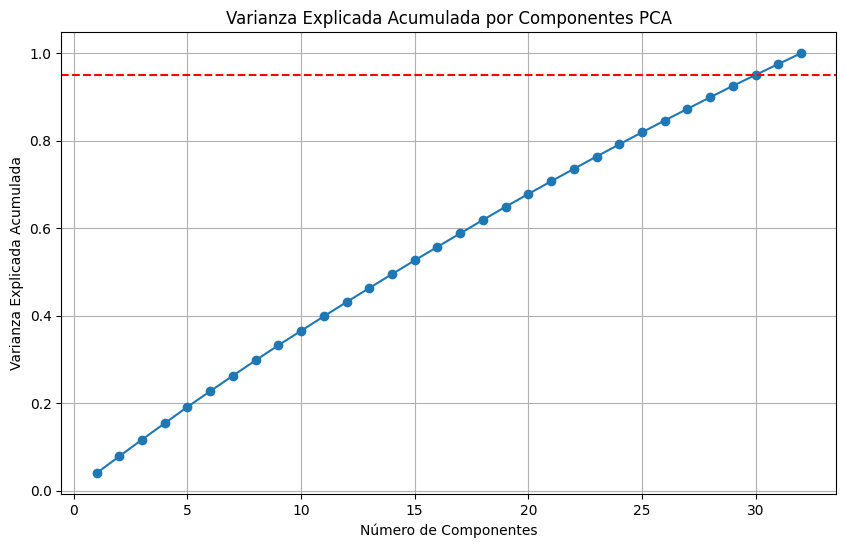

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes PCA')
plt.grid(True)
plt.show()


Al realizar el PCA vemos que nos dice que necesitamos 30 componentes para explicar el 95% de la varianza y tienemos 32 variables originales, esto indica que la mayoría de la varianza en nuestros datos está distribuida a través de casi todas las variables originales. Por lo que podemos suponer que hay poca redundancia en los datos originales.

Como el objetivo de nuestro problema es ver si un paciente es diagnosticado con Parkinson o no, aplicaremos un algoritmo de aprendizaje supervizado.

\
El aprendizaje supervisado, también conocido como machine learning supervisado, es una subcategoría del machine learning y la inteligencia artificial. Se define por el uso de conjuntos de datos etiquetados para entrenar algoritmos que clasifican los datos o predicen los resultados con precisión. El aprendizaje supervisado utiliza un conjunto de entrenamiento para enseñar a los modelos a producir el resultado deseado. Este conjunto de datos de entrenamiento incluye entradas y salidas correctas, que permiten al modelo aprender con el tiempo. El algoritmo mide su precisión a través de la función de pérdida, ajustando hasta que el error se haya minimizado lo suficiente.
\

El aprendizaje supervisado puede dividirse en dos tipos de problemas a la hora de extraer datos: clasificación y regresión

* La clasificación utiliza un algoritmo para asignar con precisión los datos de prueba en categorías específicas. Reconoce entidades específicas dentro del conjunto de datos e intenta sacar algunas conclusiones sobre cómo deben etiquetarse o definirse esas entidades. Los algoritmos de clasificación más comunes son los clasificadores lineales, las máquinas de vectores de soporte (SVM), los árboles de decisión, k vecinos más cercanos y random forest.

* La regresión se usa para entender la relación entre variables dependientes e independientes. Se utiliza habitualmente para hacer proyecciones, como los ingresos por ventas de una empresa determinada. La regresión lineal, la regresión logística y la regresión polininómica son algoritmos de regresión populares.

\
A continuación se presentan breves explicaciones de algunos de los métodos de aprendizaje más utilizados,
* Redes neuronales: principalmente aprovechadas para algoritmos de deep learning, las redes neuronales procesan los datos de entrenamiento de entrada al imitar la interconectividad del cerebro humano a través de capas de nodos. Cada nodo se compone de entradas, ponderaciones, un sesgo (umbral) y una salida. Si ese valor de salida supera un umbral determinado, se "dispara" o activa el nodo, pasando los datos a la siguiente capa de la red. Las redes neuronales aprenden a partir de ajustes basados en la función de pérdida mediante el proceso de descenso gradiente. Cuando la función de costes es igual o cercana a cero, puede confiar en la precisión del modelo.
* Naive bayes: Naive Bayes es un enfoque de clasificación que adopta el principio de independencia condicional de clases del Teorema de Bayes. Esto significa que la presencia de una característica no influye en la presencia de otra en la probabilidad de un resultado dado, y cada predictor tiene un efecto igual en ese resultado. Existen tres tipos de clasificadores Naïve Bayes: Naïve Bayes multinomial, Naïve Bayes Bernoulli y Naïve Bayes gaussiano. Esta técnica se utiliza principalmente en la clasificación de textos, la identificación de spam y los sistemas de recomendación.
* Regresión lineal: la regresión lineal se utiliza para identificar la relación entre una variable dependiente y una o más variables independientes, y suele aprovecharse para hacer predicciones sobre resultados futuros. Cuando sólo hay una variable independiente y una variable dependiente, se conoce como regresión lineal simple. A medida que aumenta el número de variables independientes, se denomina regresión lineal múltiple. Para cada tipo de regresión lineal, se busca trazar una línea de mejor ajuste, que se calcula mediante el método de los mínimos cuadrados. Sin embargo, a diferencia de otros modelos de regresión, esta línea es recta cuando se representa en un gráfico.
* Regresión logística: mientras que la regresión lineal se utiliza cuando las variables dependientes son continuas, la regresión logística se selecciona cuando la variable dependiente es categórica, lo que significa que tienen salidas binarias, como "verdadero" y "falso" o "sí" y "no". Aunque ambos modelos de regresión buscan comprender las relaciones entre las entradas de datos, la regresión logística se utiliza principalmente para resolver problemas de clasificación binaria, como la identificación de spam.
* Máquinas de vectores de soporte (SVM): una máquina de vectores de soporte es un modelo de aprendizaje supervisado popular desarrollado por Vladimir Vapnik, utilizado tanto para la clasificación de datos como para la regresión. Dicho esto, normalmente se aprovecha para problemas de clasificación, construyendo un hiperplano donde la distancia entre dos clases de puntos de datos es máxima. Este hiperplano se conoce como límite de decisión, que separa las clases de puntos de datos (por ejemplo, naranjas frente a manzanas) a ambos lados del plano.
* K vecino más cercano: K vecino más cercano, también conocido como algoritmo KNN, es un algoritmo no paramétrico que clasifica los puntos de datos según su proximidad y asociación con otros datos disponibles. Este algoritmo asume que se pueden encontrar puntos de datos similares cerca unos de otros. Como resultado, busca calcular la distancia entre puntos de datos, generalmente a través de la distancia euclidiana, y luego asigna una categoría basada en la categoría o promedio más frecuente. Su facilidad de uso y su bajo tiempo de cálculo lo convierten en el algoritmo preferido por los científicos de datos, pero a medida que crece el conjunto de datos de prueba, el tiempo de procesamiento se alarga, lo que lo hace menos atractivo para las tareas de clasificación. KNN se utiliza normalmente para motores de recomendación y reconocimiento de imágenes.
* Random forest: es otro algoritmo de machine learning supervisado flexible que se utiliza para fines de clasificación y regresión. El "forest" hace referencia a una colección de árboles de decisión no correlacionados, que luego se fusionan para reducir la varianza y crear predicciones de datos más precisas.

In [202]:
# Regresión logística
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

In [203]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train_scaled , y_train.ravel())
y_pred_NB = NB.predict(X_test_scaled)

In [204]:
# Support Vector Machine (SVM)
SVM = SVC()
SVM.fit(X_train_scaled , y_train)
y_pred_SVM = SVM.predict(X_test_scaled)

In [205]:
#K-Nearest Neighbours (kNN)
training_acc = []
test_acc = []

neighbors_setting = range(1,50)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(X_train_scaled , y_train.ravel())
    training_acc.append(KNN.score(X_train_scaled , y_train))
    test_acc.append(KNN.score(X_test_scaled , y_test))

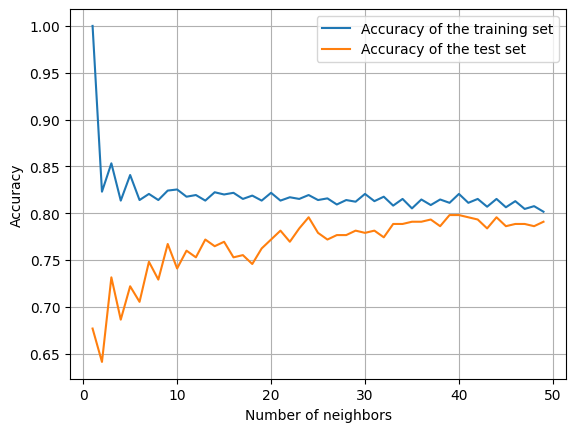

In [206]:
plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle='-')
plt.legend()

In [207]:
#Debemos determinar el número de vecinos más óptimo:
parameters = {"n_neighbors" : range(1,30)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train_scaled, y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 29 candidates, totalling 145 fits


{'n_neighbors': 26}

In [208]:
#Ejecutamos kNN con el valor óptimo de vecinos:
#Fitting 5 folds for each of 29 candidates, totalling 145 fits
#{'n_neighbors': 26}
K = 26
KNN = KNeighborsClassifier(K)
KNN.fit(X_train_scaled , y_train.ravel())
y_pred_KNN = KNN.predict(X_test_scaled)

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir los parámetros a ajustar
param_grid = {'max_depth': range(1, 20)}

# Inicializar el modelo de árbol de decisión
dt = DecisionTreeClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntuación de precisión: {best_score:.2f}")

Mejores parámetros: {'max_depth': 6}
Mejor puntuación de precisión: 0.90


In [210]:
#Árboles de decisión (DT)
#Mejores parámetros: {'max_depth': 6}
#Mejor puntuación de precisión: 0.90
DT = DecisionTreeClassifier(max_depth = 6)
DT = DT.fit(X_train_scaled , y_train)
y_pred_DT = DT.predict(X_test_scaled)


In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los parámetros a ajustar
param_grid = {'max_depth': range(1, 20)}

# Inicializar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=400, random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntuación de precisión: {best_score:.2f}")


Mejores parámetros: {'max_depth': 10}
Mejor puntuación de precisión: 0.92


In [212]:
#Random Forest
#Mejores parámetros: {'max_depth': 10}
#Mejor puntuación de precisión: 0.92
RF = RandomForestClassifier(n_estimators = 400, max_depth = 10)
RF = RF.fit(X_train_scaled , y_train)
y_pred_RF = RF.predict(X_test_scaled)


Una vez visto y aplicados los modelos realizaremos una validación de los resultados generados por las técnicas de minería de datos para cada uno de ellos para ver cual es el mejor que se adapta a nuestros datos y nos predice mejor el resultado que queremos obtener y cumpla el objetivo del problema planteado.

Interpretación de Resultados:
* Training Accuracy Score: Indica qué tan bien el modelo se ajusta a los datos de entrenamiento.
* Cross Validation Score: Proporciona una estimación de cómo se generalizará el modelo con datos nuevos y no vistos.
* Testing Accuracy Score: Evaluación del rendimiento del modelo en datos de prueba.
* Precision, Recall, F1-Score: Métricas que evalúan la precisión, sensibilidad y equilibrio entre precisión y sensibilidad del modelo en la clasificación de las clases.

La **matriz de confusión** [TN,FP;FN,TP] se interpreta de la siguiente manera:

- Verdaderos Negativos (TN) - instancias de la clase 0 correctamente predichas como clase 0.
- Falsos Positivos (FP) - instancias de la clase 1 incorrectamente predichas como clase 0.
- Falsos Negativos (FN) - instancias de la clase 0 incorrectamente predichas como clase 1.
-Verdaderos Positivos (TP) - instancias de la clase 1 correctamente predichas como clase 1.

**Cálculo de las Métricas**

* Precision (Precisión):** La precisión es la proporción de verdaderos positivos sobre el total de predicciones positivas. Se calcula de la siguiente manera:


  $$
  \text{Precision} = \frac{\text{TN}}{\text{TN} + \text{FN}}
  $$

* Recall (Sensibilidad):** El recall es la proporción de verdaderos positivos sobre el total de instancias reales de la clase positiva. Se calcula de la siguiente manera:


  $$
  \text{Recall} = \frac{\text{TN}}{\text{TN} + \text{FP}}
  $$



* F1-score:** El F1-score es la media armónica de la precisión y el recall. Se calcula de la siguiente manera:


  $$
  \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$


In [213]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

In [214]:
#Métricas para el modelo de regresión logistica.
LogReg = LogisticRegression(solver = "liblinear" , C=50)
LogReg.fit(X_train_scaled , y_train.ravel())
y_pred_LR = LogReg.predict(X_test_scaled)
print("Logistic Regression : ")
Evaluate_Performance(LogReg, X_train_scaled, X_test_scaled, y_train, y_test)

Logistic Regression : 

 • Training Accuracy Score :  82.07
 • Cross Validation Score : 81.06
 • Testing Accuracy Score :81.24
 • Precision Score is : 81.06
 • Recall Score is : 81.24
 • F1-Score Score is : 80.97


In [215]:
#Validación cruzada (desviación típica) para el modelo de regresión logistica:
kfold = KFold(37)
LR_r = cross_val_score(LogReg, X_train_scaled, y_train, cv = kfold)
print(np.std(LR_r))

0.06482455526901737


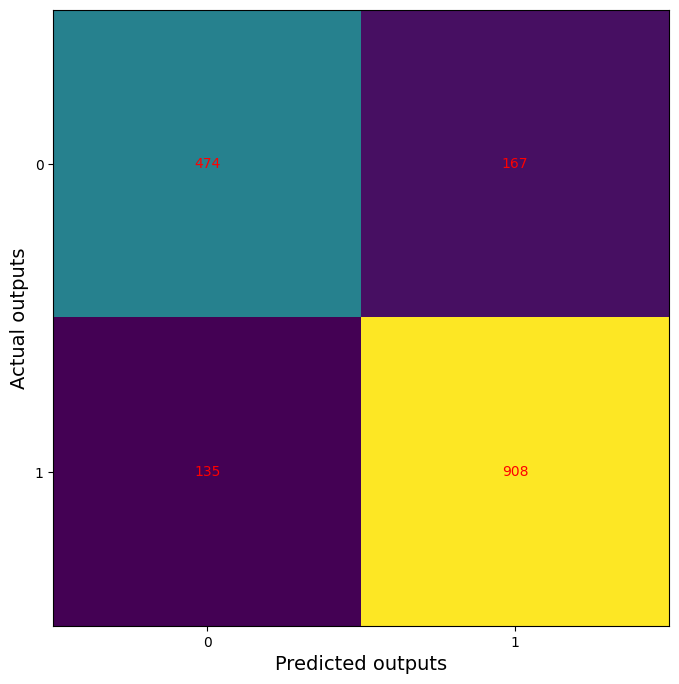

In [216]:
#matriz de confución para el modelo de regresión logistica:
cm = confusion_matrix (y_train, LogReg.predict(X_train_scaled))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5 , -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()


In [217]:
#Métricas para el modelo de Naive Bayes:
print("Naive Bayes : ")
Evaluate_Performance(NB, X_train_scaled, X_test_scaled, y_train, y_test)

Naive Bayes : 

 • Training Accuracy Score :  78.44
 • Cross Validation Score : 76.85
 • Testing Accuracy Score :77.2
 • Precision Score is : 77.25
 • Recall Score is : 77.2
 • F1-Score Score is : 77.22


In [219]:
#Validación cruzada (desviación típica) para el modelo de Naive Bayes:
NB_r = cross_val_score(NB, X_train_scaled, y_train, cv = 10)
N = np.std(NB_r)
print(N)

0.03873653915102021


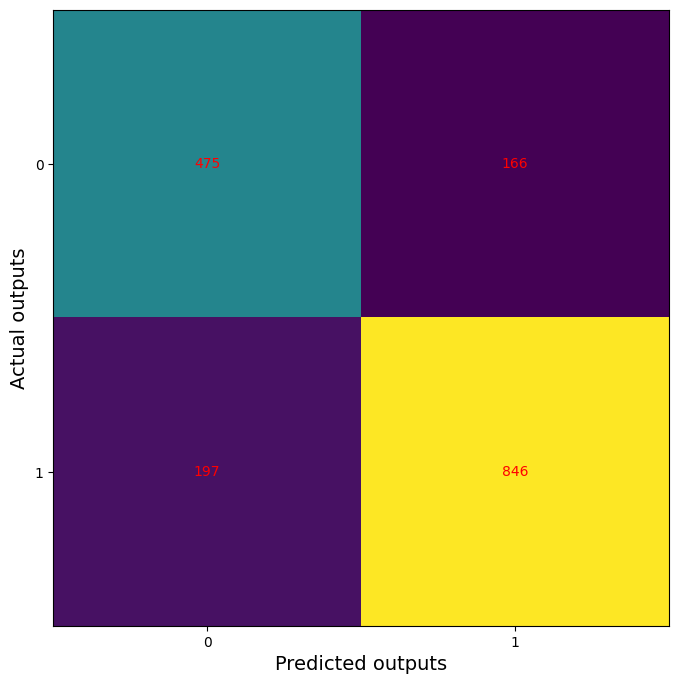

In [220]:
#matriz de confución para el modelo de Naive Bayes:
cm = confusion_matrix (y_train, NB.predict(X_train_scaled))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5 , -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

In [221]:
#Métricas para el modelo Support Vector Machine (SVM):
print("SVM : ")
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

SVM : 

 • Training Accuracy Score :  94.24
 • Cross Validation Score : 81.95
 • Testing Accuracy Score :81.71
 • Precision Score is : 81.66
 • Recall Score is : 81.71
 • F1-Score Score is : 81.32


In [222]:
#Validación cruzada (desviación típica) para el modelo Support Vector Machine (SVM):
SVM_r = cross_val_score(SVM, X_train_scaled, y_train, cv = 10)
S = np.std(SVM_r)
print(S)


0.028039685949109914


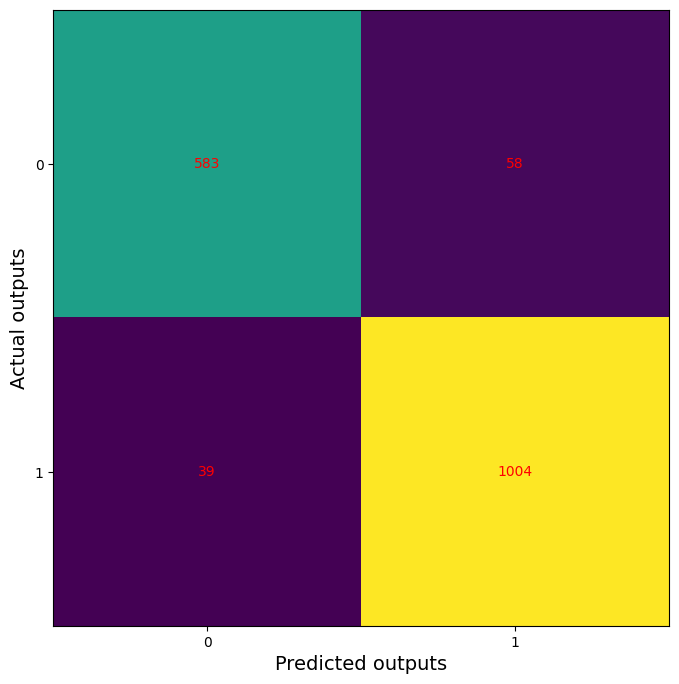

In [223]:
#matriz de confución para el modelo Support Vector Machine (SVM):
cm = confusion_matrix (y_train, SVM.predict(X_train_scaled))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5 , -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

In [224]:
#Métricas para el modelo K-Nearest Neighbours (kNN):
print("K-Nearest Neighbors : ")
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

K-Nearest Neighbors : 

 • Training Accuracy Score :  81.59
 • Cross Validation Score : 76.91
 • Testing Accuracy Score :77.2
 • Precision Score is : 76.91
 • Recall Score is : 77.2
 • F1-Score Score is : 76.94


In [225]:
#Validación cruzada (desviación típica) para el modelo K-Nearest Neighbours (kNN):
KNN_r = cross_val_score(KNN, X_train_scaled, y_train, cv = 10)
K = np.std(KNN_r)
print(K)

0.04332610406734862


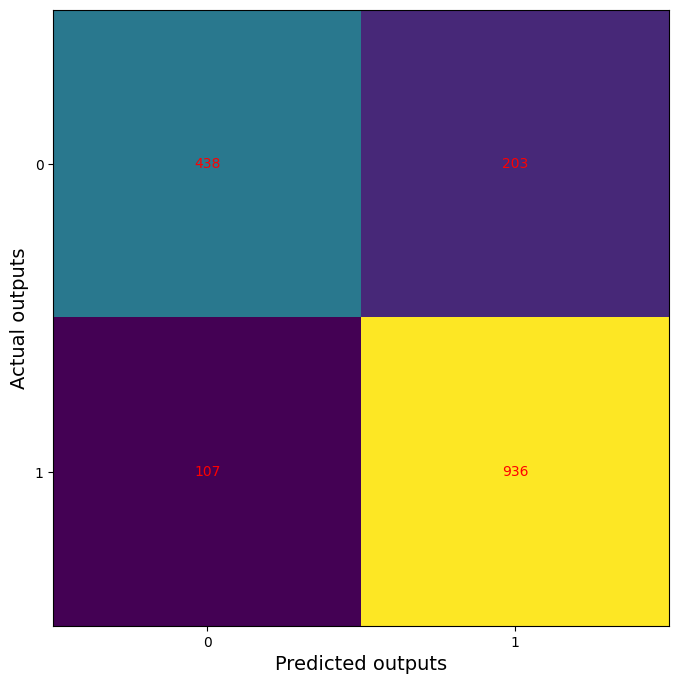

In [226]:
#matriz de confución para el modelo K-Nearest Neighbours (kNN):
cm = confusion_matrix(y_train , KNN.predict(X_train_scaled))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5 , -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

In [227]:
#Métricas para el modelo de Árboles de decisión (DT):
print("Decision Tree : ")
Evaluate_Performance(DT, X_train_scaled, X_test_scaled, y_train, y_test)

Decision Tree : 

 • Training Accuracy Score :  95.49
 • Cross Validation Score : 89.79
 • Testing Accuracy Score :90.97
 • Precision Score is : 91.1
 • Recall Score is : 90.97
 • F1-Score Score is : 90.86


In [228]:
#Validación cruzada (desviación típica) para el modelo de Árboles de decisión (DT):
DT_r = cross_val_score (DT, X_train_scaled, y_train, cv = 10)
D = np.std(DT_r)
print(D)

0.01989768667824313


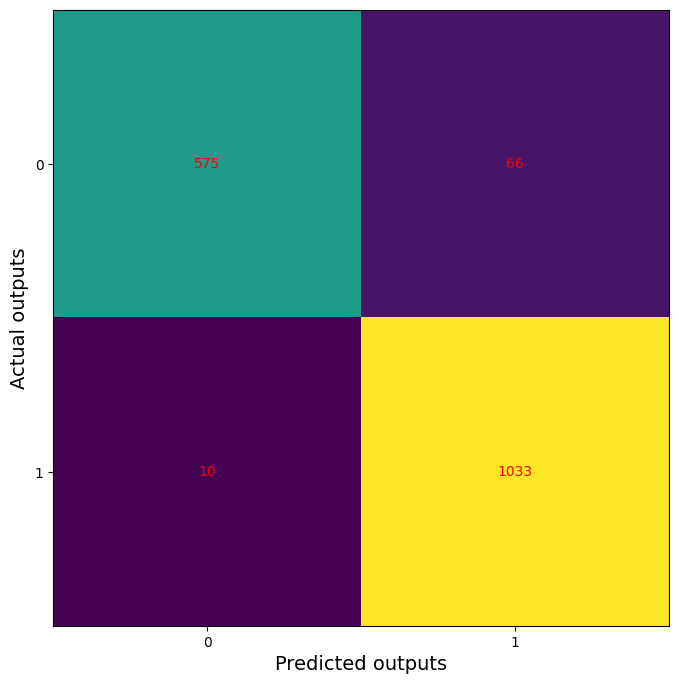

In [229]:
#matriz de confución para el modelo de Árboles de decisión (DT):
cm = confusion_matrix (y_train, DT.predict(X_train_scaled))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5 , -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

In [230]:
#Métricas para el modelo de Random Forest:
print("Random Forest : ")
Evaluate_Performance(RF, X_train_scaled, X_test_scaled, y_train, y_test)

Random Forest : 

 • Training Accuracy Score :  99.05
 • Cross Validation Score : 91.81
 • Testing Accuracy Score :91.92
 • Precision Score is : 91.95
 • Recall Score is : 91.92
 • F1-Score Score is : 91.86


In [231]:
#Validación cruzada (desviación típica) para el modelo de Random Forest:
RF_r = cross_val_score(RF, X_train_scaled, y_train, cv = 10)
R = np.std(RF_r)
print(R)

0.024479809872821213


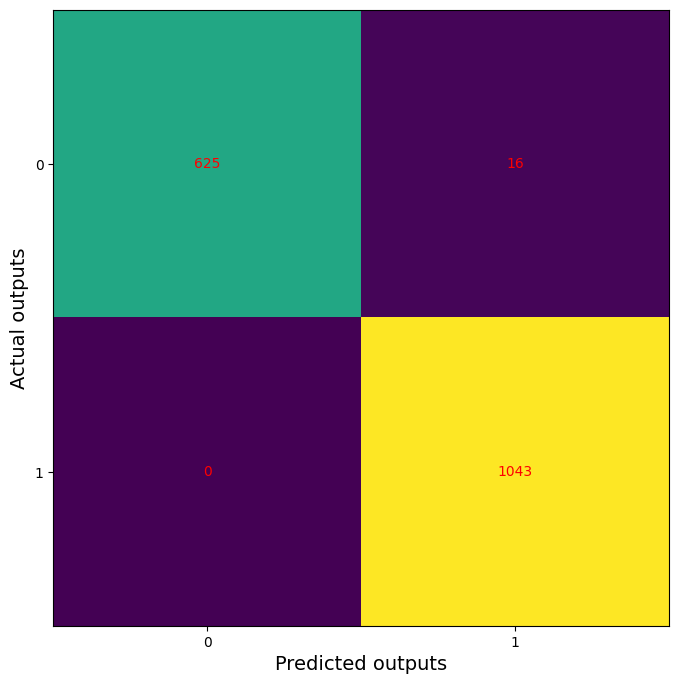

In [233]:
#matriz de confución para el modelo de Random Forest:
cm = confusion_matrix (y_train, RF.predict(X_train_scaled))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5 , -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

A continuación, vamos a ver las metricas de todos los modelos juntos para poder realizar una comparación entre ellos y ver cual sería mejor para predecir si un paciente tiene parkinson o no.

In [234]:
models = pd.DataFrame ({'Model' : ['Logestic Regression' , ' KNN' , 'Naive Bayes' , 'SVM' , 'Decision Tree' , 'Random Forest'] ,
                        'Precision' : [precision_score(y_test, y_pred_LR, average='weighted') , precision_score(y_test, y_pred_KNN, average='weighted') , precision_score(y_test, y_pred_NB, average='weighted') , precision_score(y_test, y_pred_SVM, average='weighted') , precision_score(y_test, y_pred_DT, average='weighted') , precision_score(y_test, y_pred_RF, average='weighted')] ,
                        'Recall' : [recall_score(y_test, y_pred_LR, average='weighted') , recall_score(y_test, y_pred_KNN, average='weighted') , recall_score(y_test, y_pred_NB, average='weighted') , recall_score(y_test, y_pred_SVM, average='weighted') , recall_score(y_test, y_pred_DT, average='weighted') , recall_score(y_test, y_pred_RF, average='weighted')] ,
                        'F1-score' : [f1_score(y_test, y_pred_LR, average='weighted') , f1_score(y_test, y_pred_KNN, average='weighted') , f1_score(y_test, y_pred_NB, average='weighted') , f1_score(y_test, y_pred_SVM, average='weighted') , f1_score(y_test, y_pred_DT, average='weighted') , f1_score(y_test, y_pred_RF, average='weighted')] ,
                        'Accuracy' : [accuracy_score(y_test, y_pred_LR) , accuracy_score(y_test, y_pred_KNN) , accuracy_score(y_test, y_pred_NB) , accuracy_score(y_test, y_pred_SVM) , accuracy_score(y_test, y_pred_DT) , accuracy_score(y_test, y_pred_RF)],
                        'Err' : [np.std(LR_r) , np.std(KNN_r) , np.std(NB_r) , np.std(SVM_r) , np.std(DT_r) , np.std(RF_r)]})

print(tabulate(models, headers='keys', tablefmt='rst'))

====  ===================  ===========  ========  ==========  ==========  =========
  ..  Model                  Precision    Recall    F1-score    Accuracy        Err
====  ===================  ===========  ========  ==========  ==========  =========
   0  Logestic Regression     0.810647  0.812352    0.809724    0.812352  0.0648246
   1  KNN                     0.769098  0.771971    0.769362    0.771971  0.0433261
   2  Naive Bayes             0.772546  0.771971    0.772241    0.771971  0.0387365
   3  SVM                     0.816627  0.817102    0.813173    0.817102  0.0280397
   4  Decision Tree           0.911019  0.909739    0.908553    0.909739  0.0198977
   5  Random Forest           0.919864  0.91924     0.918447    0.91924   0.0244798
====  ===================  ===========  ========  ==========  ==========  =========


<ipython-input-235-9a1b96111431>:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(models['Accuracy'], models['Model'], xerr = models['Err'] , fmt='o', marker='s', color='b'


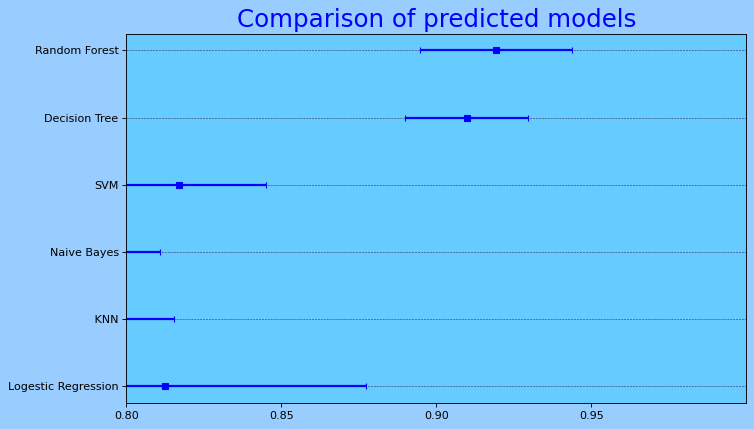

In [235]:
fig, ax = plt.subplots(figsize=(10, 6), dpi= 80, facecolor='#99ccff')
ax.set_facecolor('#66ccff')
ax.set_title('Comparison of predicted models', fontdict={'size':22} , color='b')
ax.errorbar(models['Accuracy'], models['Model'], xerr = models['Err'] , fmt='o', marker='s', color='b'
            , linewidth=2, capsize=3)
ax.set(xlim=(0.8, 1), xticks=np.arange(0.8, 1, step = 0.05))
plt.grid(color = '#333366', axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

Hemos visto todos los modelos de clasificación de aprendizaje supervizado, con el objetivo de predecir si un paciente tiene parkinson o no, y hemos hecho una validación de cada modelo. Al hacer esto hemos visto que el modelo que menor error genera y que tiene mejores valores de metrica es el modelo de Random Forest, por lo cual es el que podemos tomar para predecir el futuro de pacientes y ver si tienen parkinson o no. Además vemos que en la matriz de confución de ese modelo tiene las siguentes salidas:

* 625: Verdaderos Negativos (TN) - instancias de la clase 0 correctamente predichas como clase 0.
* 16: Falsos Positivos (FP) - instancias de la clase 1 incorrectamente predichas como clase 0.
* 0: Falsos Negativos (FN) - instancias de la clase 0 incorrectamente predichas como clase 1.
* 1043: Verdaderos Positivos (TP) - instancias de la clase 1 correctamente predichas como clase 1.

Por lo que vemos que la matriz de confusión proporciona una evaluación muy positiva del modelo de clasificación, es decir, el modelo tiene una capacidad muy alta para distinguir entre las clases 0 y 1 (si el paciente tiene parkinson o no). Podemos apreciar además que el valor de Training Accuracy Score del modelo de Random Forest que hemos dicho que es el que consideraremos para predecir valores futuros es de 100, lo que indica qué el modelo se ajusta bien a los datos de entrenamiento.

Como conclusión, sería importante validar el modelo con más datos para asegurar que estas conclusiones sean generalizables y no específicas de este conjunto de datos de entrenamiento.